In [3]:
symbol='BTCUSDT'

In [4]:
from binance.client import Client
import pandas as pd
import time

# Initialize the Binance client
api_key = "sytvkKKUmXPabC877r7MFv7rhibYAMoczrMdTse0OSB6dRyImx1G8yEInE889y00"
api_secret = "KYgkq441X5spXpdDoLELwlcoJ3k7uh9LeXGgf7aQvABSMZl42Py3OUIwFCqVgc6L"
client = Client(api_key, api_secret)

def fetch_ohlcv_batch(client, symbol, interval, start_time, limit=1000):
    """
    Fetch a batch of OHLCV data from Binance.
    """
    try:
        candles = client.get_klines(
            symbol=symbol,
            interval=interval,
            startTime=start_time,
            limit=limit
        )
        # Transform data into desired format
        ohlcv = [
            [int(c[0]), float(c[1]), float(c[2]), float(c[3]), float(c[4]), float(c[5])]
            for c in candles
        ]
        return ohlcv
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

def fetch_historical_ohlcv(client, symbol, interval, start_time, limit=1000):
    """
    Fetch historical OHLCV data in batches from Binance.
    """
    all_data = []
    while True:
        data = fetch_ohlcv_batch(client, symbol, interval, start_time, limit)
        if data:
            # Append data to all_data
            all_data.extend(data)
            # Update `start_time` to the timestamp of the last fetched data point + 1 millisecond
            start_time = data[-1][0] + 1
            print(f"Fetched {len(data)} data points. Total so far: {len(all_data)}")
        else:
            print("No more data to fetch or an error occurred.")
            break

        # If the batch size is less than the limit, it means we reached the end of available data
        if len(data) < limit:
            print("Reached the end of available data.")
            break

        # To avoid rate limit issues, wait for a short while
        time.sleep(1)

    # Convert data to DataFrame
    df = pd.DataFrame(all_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    return df

# Usage example
if __name__ == "__main__":
    # Define parameters
    # symbol = 'BTCUSDT'        # Symbol to fetch (without '/')
    interval = Client.KLINE_INTERVAL_1HOUR  # Timeframe ('1m', '5m', '1h', '1d', etc.)
    start_time = int(pd.Timestamp("2007-01-01").timestamp() * 1000)  # Start date in milliseconds
    limit = 1000              # Max data points per batch

    # Fetch historical data
    df = fetch_historical_ohlcv(client, symbol, interval, start_time, limit)
    print(f"Total fetched data points: {len(df)}")
    print(df.head())

Fetched 1000 data points. Total so far: 1000
Fetched 1000 data points. Total so far: 2000
Fetched 1000 data points. Total so far: 3000
Fetched 1000 data points. Total so far: 4000
Fetched 1000 data points. Total so far: 5000
Fetched 1000 data points. Total so far: 6000
Fetched 1000 data points. Total so far: 7000
Fetched 1000 data points. Total so far: 8000
Fetched 1000 data points. Total so far: 9000
Fetched 1000 data points. Total so far: 10000
Fetched 1000 data points. Total so far: 11000
Fetched 1000 data points. Total so far: 12000
Fetched 1000 data points. Total so far: 13000
Fetched 1000 data points. Total so far: 14000
Fetched 1000 data points. Total so far: 15000
Fetched 1000 data points. Total so far: 16000
Fetched 1000 data points. Total so far: 17000
Fetched 1000 data points. Total so far: 18000
Fetched 1000 data points. Total so far: 19000
Fetched 1000 data points. Total so far: 20000
Fetched 1000 data points. Total so far: 21000
Fetched 1000 data points. Total so far: 220

In [5]:
df.head()

,timestamp,open,high,low,close,volume
0,2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009
1,2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916
2,2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691
3,2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249
4,2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807


In [6]:
df.tail()

,timestamp,open,high,low,close,volume
65006,2025-01-21 02:00:00,101498.23,102763.33,101064.87,102545.56,2051.95936
65007,2025-01-21 03:00:00,102545.57,103260.10,102300.00,102936.01,1441.04326
65008,2025-01-21 04:00:00,102936.01,102974.14,101928.58,102344.20,1377.70334
65009,2025-01-21 05:00:00,102344.21,102527.39,101339.49,101365.98,1362.86605
65010,2025-01-21 06:00:00,101365.98,101989.67,101111.68,101767.25,868.46706


In [7]:
# Select all rows except the last one
df = df.iloc[:-1]

In [8]:
df.tail()

,timestamp,open,high,low,close,volume
65005,2025-01-21 01:00:00,101187.75,102233.26,100119.04,101498.24,3823.93670
65006,2025-01-21 02:00:00,101498.23,102763.33,101064.87,102545.56,2051.95936
65007,2025-01-21 03:00:00,102545.57,103260.10,102300.00,102936.01,1441.04326
65008,2025-01-21 04:00:00,102936.01,102974.14,101928.58,102344.20,1377.70334
65009,2025-01-21 05:00:00,102344.21,102527.39,101339.49,101365.98,1362.86605


In [9]:
df.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [10]:
df_daily=df.copy()

In [11]:
df_daily

,timestamp,open,high,low,close,volume
0,2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009
1,2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916
2,2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691
3,2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249
4,2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807
...,...,...,...,...,...,...
65005,2025-01-21 01:00:00,101187.75,102233.26,100119.04,101498.24,3823.936700
65006,2025-01-21 02:00:00,101498.23,102763.33,101064.87,102545.56,2051.959360
65007,2025-01-21 03:00:00,102545.57,103260.10,102300.00,102936.01,1441.043260
65008,2025-01-21 04:00:00,102936.01,102974.14,101928.58,102344.20,1377.703340


In [12]:
countrows=len(df_daily)
countrows

65010

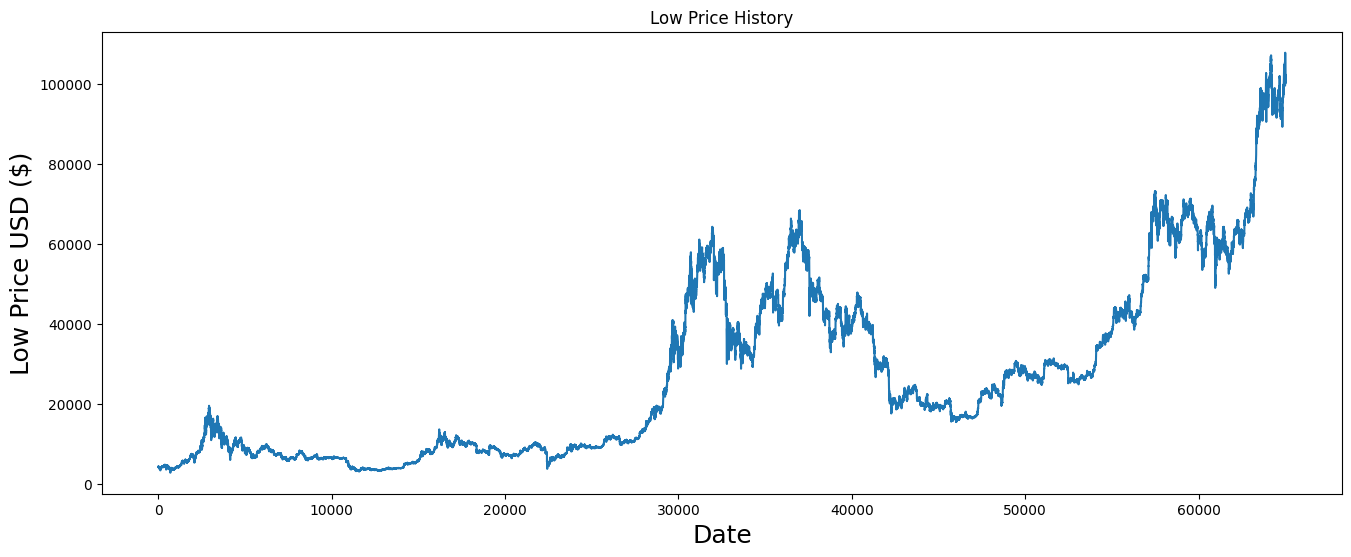

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
plt.title('Low Price History')
plt.plot(df_daily['low'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Low Price USD ($)', fontsize=18)
plt.show()

In [14]:
import numpy as np
# Create a new dataframe with only the Low column 
data = df_daily.filter(['low'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

61760

In [15]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01376021],
       [0.0140465 ],
       [0.01421799],
       ...,
       [0.94778652],
       [0.94424796],
       [0.93863563]])

In [16]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.01376021, 0.0140465 , 0.01421799, 0.01400877, 0.01444616,
       0.01470035, 0.01507962, 0.01534152, 0.01518623, 0.01518623,
       0.01542374, 0.01444712, 0.01370286, 0.01351374, 0.01335397,
       0.01318306, 0.01373392, 0.01421665, 0.01422399, 0.01394599,
       0.01345001, 0.01255303, 0.01349993, 0.01349993, 0.01350403,
       0.01365274, 0.01363093, 0.01384748, 0.01374621, 0.01379841,
       0.01409099, 0.01415463, 0.01401239, 0.01337655, 0.01311599,
       0.01317601, 0.01350507, 0.01190442, 0.01238916, 0.01142016,
       0.01109081, 0.01068724, 0.01068724, 0.01208877, 0.01207353,
       0.01263401, 0.01268565, 0.01225683, 0.01171131, 0.01153572,
       0.01114549, 0.01063427, 0.01092837, 0.01126106, 0.01109986,
       0.00984152, 0.01059311, 0.0116087 , 0.01140111, 0.01093399])]
[0.010826619650962516]

[array([0.01376021, 0.0140465 , 0.01421799, 0.01400877, 0.01444616,
       0.01470035, 0.01507962, 0.01534152, 0.01518623, 0.01518623,
       0.01542374, 0.01444712, 0.0

In [17]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2025-01-21 06:31:06.598382: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-21 06:31:06.602026: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-21 06:31:06.612788: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737441066.633447 3345982 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737441066.639512 3345982 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-21 06:31:06.660676: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

61700/61700 ━━━━━━━━━━━━━━━━━━━━ 1388s 22ms/step - loss: 1.6622e-04


In [18]:
# from keras.models import Sequential
# from keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
# from keras.callbacks import EarlyStopping, LearningRateScheduler
# from keras.optimizers import Adam

# # Build the LSTM model with improvements
# model = Sequential()

# # Bidirectional LSTM layer
# model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(x_train.shape[1], 1)))
# model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
# model.add(BatchNormalization())  # Batch normalization

# model.add(LSTM(64, return_sequences=False))
# model.add(Dropout(0.2))  # Dropout layer

# # Dense layer with 25 neurons
# model.add(Dense(25))

# # Output layer with 1 neuron (regression output)
# model.add(Dense(1))

# # Compile the model with a custom optimizer
# model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# # Implement EarlyStopping and LearningRateScheduler callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# lr_scheduler = LearningRateScheduler(lambda epoch, lr: lr * 0.1 if epoch % 10 == 0 and epoch != 0 else lr)

# # Train the model
# model.fit(x_train, y_train, batch_size=32, epochs=100, validation_split=0.2, 
#           callbacks=[early_stopping, lr_scheduler])


In [19]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]  # Actual values for comparison
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)  # Inverse scale the predictions

# Calculate RMSE
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))

# Calculate MAE
mae = np.mean(np.abs(predictions - y_test))

# Calculate MSE
mse = np.mean((predictions - y_test) ** 2)

# Calculate R²
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_residual = np.sum((y_test - predictions) ** 2)
r2 = 1 - (ss_residual / ss_total)

# Calculate MAPE
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

# Print all metrics
print(f"RMSE: {round(rmse, 2)}")
print(f"MAE: {round(mae, 2)}")
print(f"MSE: {round(mse, 2)}")
print(f"R²: {round(r2, 2)}")
print(f"MAPE: {round(mape, 2)}%")

102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step
RMSE: 989.05
MAE: 794.0
MSE: 978211.54
R²: 1.0
MAPE: 0.92%


/tmp/ipykernel_3345982/3683683532.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


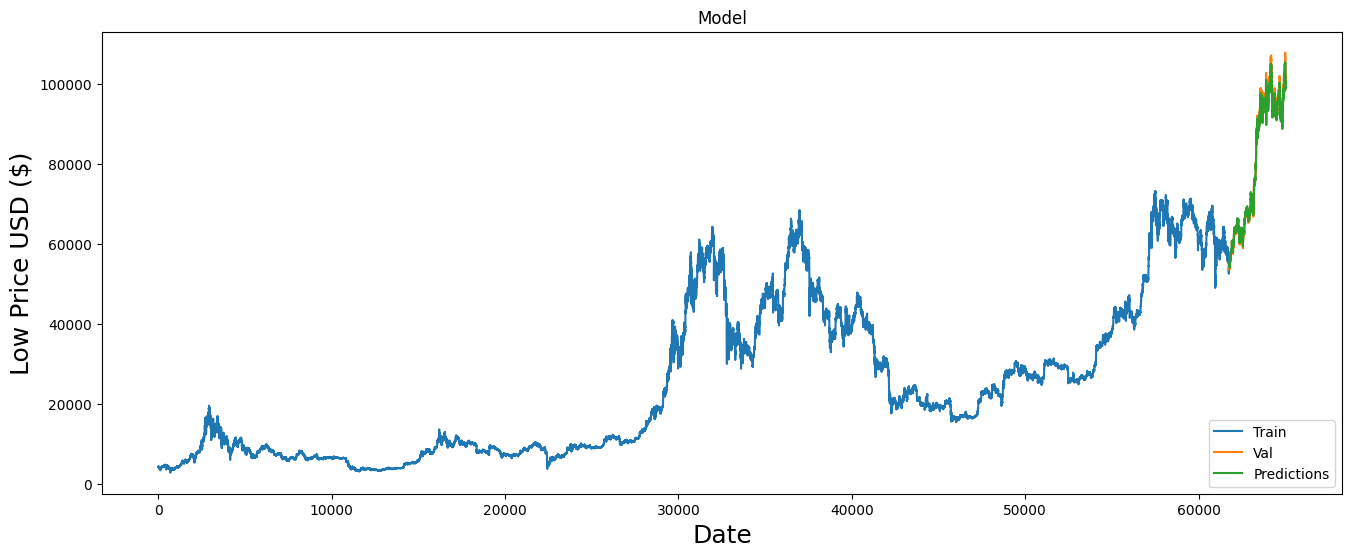

In [20]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Low Price USD ($)', fontsize=18)
plt.plot(train['low'])
plt.plot(valid[['low', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [21]:
# Show the valid and predicted prices
valid

,low,Predictions
61760,54166.00,54637.929688
61761,53867.00,54557.917969
61762,53868.00,54255.808594
61763,53814.01,54282.964844
61764,53964.00,54209.761719
...,...,...
65005,100119.04,99574.500000
65006,101064.87,98715.984375
65007,102300.00,99611.734375
65008,101928.58,100656.453125


In [22]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
# from datetime import datetime, timedelta

# def predict_next_n_days(model, last_sequence, scaler, start_date=None, n_days=5):
#     """
#     Predict the next n days of prices using the trained model
    
#     Parameters:
#     model: trained LSTM model
#     last_sequence: last 60 days of scaled data
#     scaler: fitted MinMaxScaler object
#     start_date: starting date for predictions (defaults to today if None)
#     n_days: number of days to predict (default 5)
    
#     Returns:
#     DataFrame with dates and predicted prices
#     """
#     # Make a copy of the last sequence
#     curr_sequence = last_sequence.copy()
    
#     # List to store predictions
#     future_predictions = []
    
#     # Use provided start date or today's date
#     if start_date is None:
#         start_date = pd.Timestamp.today()  # Current date
#     else:
#         start_date = pd.to_datetime(start_date)
    
#     # Predict n days
#     for i in range(n_days):
#         # Get prediction for next day
#         curr_sequence_reshaped = curr_sequence.reshape((1, curr_sequence.shape[0], 1))
#         predicted_price = model.predict(curr_sequence_reshaped)
        
#         # Store the prediction
#         future_predictions.append(predicted_price[0, 0])
        
#         # Update sequence by removing first element and adding the predicted value
#         curr_sequence = np.roll(curr_sequence, -1)
#         curr_sequence[-1] = predicted_price
    
#     # Create dates for predictions starting from the day after start_date
#     future_dates = [start_date + timedelta(days=x+1) for x in range(n_days)]
    
#     # Convert predictions back to original scale
#     predictions_unscaled = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
    
#     # Create DataFrame with predictions
#     future_predictions_df = pd.DataFrame(
#         predictions_unscaled,
#         index=future_dates,
#         columns=['Predicted_Price']
#     )
    
#     return future_predictions_df

# # Usage example:
# # Get the last x days of scaled data
# last_x_days = scaled_data[-countrows:]

# # Reshape the data
# last_x_days_scaled = last_x_days.reshape((countrows, 1))

# # Make predictions for next 5 days starting from January 12, 2025
# future_predictions = predict_next_n_days(
#     model=model,
#     last_sequence=last_x_days_scaled,
#     scaler=scaler,
#     start_date= "01-12-2025",
#     n_days=5
# )

# # Print the predictions
# print("\nPredicted prices for the next 5 days:")
# print(future_predictions)

In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

def predict_next_n_hours(model, last_sequence, scaler, start_date=None, n_predictions=5, prediction_interval=4):
    """
    Predict the next n predictions at specified intervals (e.g., 1 hour, 2 hours, 3 hours, etc.) using the trained model
    
    Parameters:
    model: trained LSTM model
    last_sequence: last sequence of scaled data
    scaler: fitted MinMaxScaler object
    start_date: starting date for predictions (defaults to now if None)
    n_predictions: number of predictions to make (default 5)
    prediction_interval: interval in hours for each prediction (default 4 hours)
    
    Returns:
    DataFrame with datetime indices and predicted prices
    """
    # Make a copy of the last sequence
    curr_sequence = last_sequence.copy()
    
    # List to store predictions
    future_predictions = []
    
    # Use provided start date or current date
    if start_date is None:
        start_date = pd.Timestamp.today()  # Current date
    else:
        start_date = pd.to_datetime(start_date)
    
    # Predict the next n_predictions at specified intervals
    for i in range(n_predictions):
        # Get prediction for the next interval (e.g., 1, 2, 3, hours)
        curr_sequence_reshaped = curr_sequence.reshape((1, curr_sequence.shape[0], 1))
        predicted_price = model.predict(curr_sequence_reshaped)
        
        # Store the prediction
        future_predictions.append(predicted_price[0, 0])
        
        # Update sequence by removing first element and adding the predicted value
        curr_sequence = np.roll(curr_sequence, -1)
        curr_sequence[-1] = predicted_price
    
    # Create timestamps for predictions at specified intervals
    future_dates = [start_date + timedelta(hours=prediction_interval*(i+1)) for i in range(n_predictions)]
    
    # Convert predictions back to the original scale
    predictions_unscaled = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
    
    # Create DataFrame with predictions
    future_predictions_df = pd.DataFrame(
        predictions_unscaled,
        index=future_dates,
        columns=['Predicted_Price']
    )
    
    return future_predictions_df

# Usage example:
# Get the last x hours of scaled data (this could be in the form of the last 60 observations, for example)
last_x_hours = scaled_data[-countrows:]

# Reshape the data
last_x_hours_scaled = last_x_hours.reshape((countrows, 1))

# Make predictions for the next 5 intervals (1, 2, 3, 4, 5 hours)
future_predictions = predict_next_n_hours(
    model=model,
    last_sequence=last_x_hours_scaled,
    scaler=scaler,
    start_date=datetime.today(),
    n_predictions=5,
    prediction_interval=1  # Change this to 1, 2, 3, etc. for different intervals
)

# Print the predictions
print("\nPredicted prices for the next 5 time intervals (1 hour, 2 hours, 3 hours, etc.):")
print(future_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step

Predicted prices for the next 5 time intervals (1 hour, 2 hours, 3 hours, etc.):
                            Predicted_Price
2025-01-21 07:55:13.226562     99803.531250
2025-01-21 08:55:13.226562     98411.867188
2025-01-21 09:55:13.226562     97194.281250
2025-01-21 10:55:13.226562     96089.890625
2025-01-21 11:55:13.226562     95085.093750


In [24]:
# Define the Mean Absolute Error (MAE)
MAE = round(mae, 2)  # Replace with the actual MAE value if known

# Add Max and Min columns
future_predictions['Max'] = future_predictions['Predicted_Price'] + MAE
future_predictions['Min'] = future_predictions['Predicted_Price'] - MAE

# Print the updated DataFrame
print("\nPredicted prices with Max and Min for the next 5 days:")
print(future_predictions)


Predicted prices with Max and Min for the next 5 days:
                            Predicted_Price            Max           Min
2025-01-21 07:55:13.226562     99803.531250  100597.531250  99009.531250
2025-01-21 08:55:13.226562     98411.867188   99205.867188  97617.867188
2025-01-21 09:55:13.226562     97194.281250   97988.281250  96400.281250
2025-01-21 10:55:13.226562     96089.890625   96883.890625  95295.890625
2025-01-21 11:55:13.226562     95085.093750   95879.093750  94291.093750
